In [4]:
# !pip install opencv_python

In [5]:
#  1. 버전 확인
import cv2
print(cv2.__version__)

4.10.0


In [6]:
# 2. 간단하게 이미지 불러오기

img = cv2.imread('example_img1.png', cv2.IMREAD_UNCHANGED)
img

array([[[109,  22,   6],
        [130,  50,  27],
        [164,  93,  60],
        ...,
        [141, 248, 252],
        [110, 228, 229],
        [ 94, 217, 215]],

       [[149,  66,  45],
        [136,  57,  30],
        [162,  91,  54],
        ...,
        [ 79, 183, 188],
        [132, 245, 248],
        [115, 235, 235]],

       [[132,  57,  25],
        [118,  44,   8],
        [195, 120,  76],
        ...,
        [ 90, 188, 194],
        [124, 230, 237],
        [143, 254, 255]],

       ...,

       [[ 35,  18,  45],
        [ 36,  20,  44],
        [ 35,  20,  41],
        ...,
        [ 37,  26,  34],
        [ 42,  30,  36],
        [ 38,  26,  32]],

       [[ 45,  33,  53],
        [ 41,  29,  47],
        [ 38,  26,  44],
        ...,
        [ 35,  24,  32],
        [ 40,  28,  34],
        [ 40,  26,  32]],

       [[ 47,  37,  53],
        [ 39,  29,  45],
        [ 36,  24,  42],
        ...,
        [ 30,  19,  27],
        [ 41,  27,  33],
        [ 44,  30,  36]]

In [7]:
print("이미지 크기", img.shape)
print("이미지 유형", img.dtype)
print("이미지 차원", img.ndim)
print("이미지 사이즈", img.size)
print("이미지의 컬러 최소값", img.min())
print("이미지의 컬러 최대값", img.max())

이미지 크기 (640, 1024, 3)
이미지 유형 uint8
이미지 차원 3
이미지 사이즈 1966080
이미지의 컬러 최소값 0
이미지의 컬러 최대값 255


In [8]:
# 3. 이미지 출력하기
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

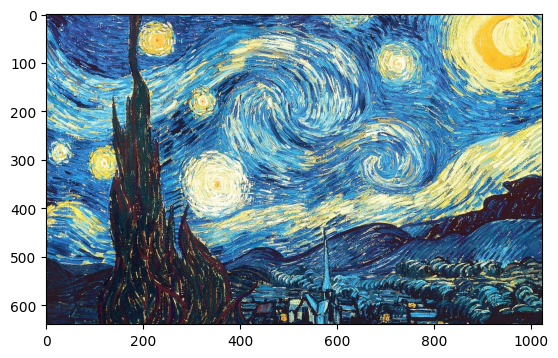

In [9]:
import matplotlib.pyplot as plt

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

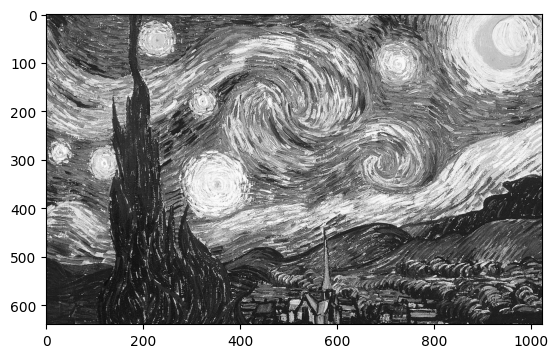

In [10]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray")
plt.show()

In [11]:
# 이미지 저장
cv2.imwrite("new_example_gray.jpg", img_gray)

True

In [12]:
# 이미지 저장
cv2.imwrite("new_example_rgb.jpg", img_rgb)

True

In [13]:
# 픽셀에 접근해보기
pixel = img[280:400,300:430]
cv2.imshow("pixel", pixel)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
# 이미지 변경해보기

star = cv2.imread("star.jpg")
resized_star = cv2.resize(star, (128, 128))
img[:128,:128] = resized_star  # star 대신 resized_star 사용
cv2.imshow("star", resized_star)  # 크기 조정된 이미지 표시
cv2.waitKey(0)
cv2.destroyAllWindows()

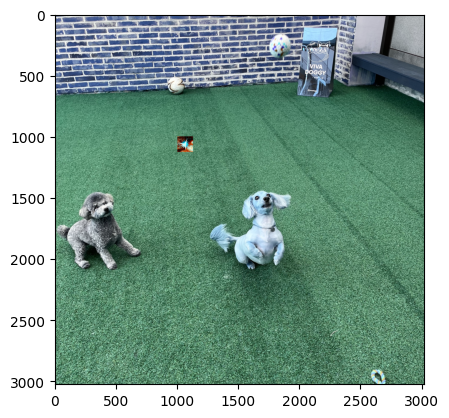

In [15]:
# **님 이미지로 실행해보기
img = cv2.imread("kakao_13.jpg")
star = cv2.imread("star.jpg")
resized_star = cv2.resize(star, (128,128))
img[1000:1128, 1000:1128] = resized_star
plt.imshow(img)
plt.show()

### 이미지 채널 분리 & 합성

In [16]:
import cv2

img = cv2.imread("kakao_13.jpg")

b, g, r = cv2.split(img) # b,g,r 채널로 분리가 됨

# green 채널의 색상을 반으로 변경
g = cv2.divide(g, 2)

# red 색상의 픽셀값에 50 추가 해보기
r = cv2.add(r, 50)

img_merged = cv2.merge([b, g, r])
original_name = "original_img"
modified_name = "modified_img"

cv2.namedWindow(original_name, cv2.WINDOW_NORMAL)
cv2.namedWindow(modified_name, cv2.WINDOW_NORMAL)

cv2.resizeWindow(original_name, 512, 512)
cv2.resizeWindow(modified_name, 512, 512)

cv2.imshow(original_name, img)
cv2.imshow(modified_name, img_merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 크기 조정

In [17]:
h, w = img.shape[:2]

In [18]:
# 이미지 확대
larged_img = cv2.resize(img, (2*h, 2*w), interpolation = cv2.INTER_LINEAR)

# 이미지 축소
reduced_img = cv2.resize(img, (h//2, w//2), interpolation = cv2.INTER_AREA)

cv2.namedWindow('laged_img', cv2.WINDOW_NORMAL)
cv2.resizeWindow('laged_img', 512, 512)

cv2.namedWindow('reduced_img', cv2.WINDOW_NORMAL)
cv2.resizeWindow('reduced_img', 512, 512)

cv2.imshow('laged_img', larged_img)
cv2.imshow('reduced_img', reduced_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
def display_imges(images, h=512, w=512):

    for idx, img in enumerate(images):
        img_name = f"img_{idx}"
        cv2.namedWindow(img_name)
        cv2.resizeWindow(img_name, h, w)
        cv2.imshow(img_name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [20]:
display_imges([larged_img, reduced_img])

### 이동 & 회전

In [21]:
import numpy as np
tx = 50
ty = 30
translate_metrix = np.float32([[1, 0, tx], [0, 1, ty]])
h, w = img.shape[:2]

# 이동된 이미지
translate_img = cv2.warpAffine(img, translate_metrix, (3024, 3024))
img_name = "img"
cv2.namedWindow(img_name)
cv2.resizeWindow(img_name, 512, 512)
cv2.imshow(img_name, translate_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
## 회전
angle = 45
img = cv2.imread("kakao_13.jpg")
h, w = img.shape[:2]

center = h//2, w//2
center

(1512, 1512)

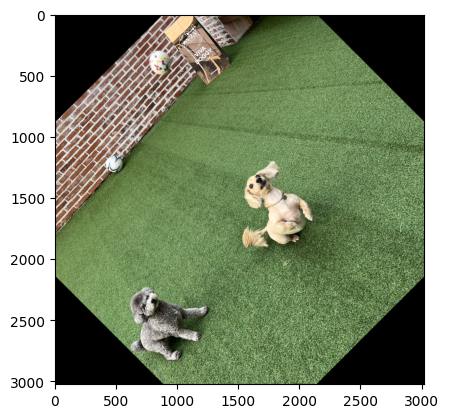

In [23]:
import matplotlib.pyplot as plt

# 회전 메트릭스 계산
rotation_metrix = cv2.getRotationMatrix2D(center, angle, 1.0)

# 이미지 회전해보기
rotated_img = cv2.warpAffine(img, rotation_metrix, (w, h))

rotated_img_rgb = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB)
plt.imshow(rotated_img_rgb)
plt.show()

### 기하학 변환

In [24]:
import cv2
import numpy as np

img = cv2.imread('business-card_640.jpg')
print(img.shape)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(427, 640, 3)


In [25]:
w, h = 720, 480

srcQuad = np.array([[160, 207],[395,112],[487,221],[239,327]],np.float32)
dstQuad = np.array([[0, 0],[w-1,0],[w-1,h-1],[0,h-1]],np.float32)

pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
result = cv2.warpPerspective(img, pers, (w,h))

cv2.imshow("img", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지에 사각형, 원, 텍스트 표시해보기

In [26]:
img = cv2.imread("example_img1.png")
print(img.shape)

cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(640, 1024, 3)


In [27]:
img = cv2.imread("example_img1.png")


x, y, w, h = 250, 250, 200, 200

# 사각형 그리기
cv2.rectangle(img, (x, y), (x+w, y+h), (0,0,255),2)

# 원그리기 - 중심점, 크기
cv2.circle(img, (700, 200), 50 ,(255,0,0), 3)

# 텍스트그리기 - 영어만 됩니다. cv2
cv2.putText(img, "hello gumi friends", (50,600),cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255),2)



cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
#
drawing = False # 마우스가 클릭이 된 상태인지 확인하는 변수
ix, iy = -1, -1
ex, ey = -1, -1

# 마우스 콜백 함수
def draw_rectangle(event, x, y, flags, param):
    global ix, iy, drawing, ex, ey

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy =x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            ex, ey = x, y
    elif event == cv2.EVENT_LBUTTONUP:
        drawing=False
        ex, ey =x, y
        cv2.rectangle(img, (ix, iy), (ex, ey), (0,0,255), 2)

img = cv2.imread("example_img1.png")
cv2.namedWindow('image')
cv2.setMouseCallback("image", draw_rectangle)

while True:
    try:
        cv2.imshow('image', img)
        key = cv2.waitKey(1)
        if key==27: #esc 27
            cv2.destroyAllWindows()
            break
    except:
        cv2.destroyAllWindows()
        break

### 클릭시 점 찍기 + 점찍은 포인트 출력

In [29]:
points = [] # 클릭한 점들을 저장할 리스트

# 마우스 콜백 함수 - 클릭 순서는 왼쪽상단부터 시계방향으로 클릭
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN and len(points) < 4: # 4개 미만의 점을 클릭한 경우
        points.append((x, y))
        cv2.circle(img, (x, y), 5, (0, 255, 0), -1) # 클릭한 위치에 초록색 원을 그림
        cv2.putText(img, f"{len(points)}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.imshow('Image', img)

        if len(points) == 4: # 4개의 점이 선택되었을 때
            warp_perspective()

def warp_perspective():
    # 변환될 이미지의 가로와 세로 크기를 정합니다.
    w, h = 300, 200
    src = np.float32(points) # 원본 이미지에서 4개의 점
    dst = np.float32([[0, 0], [w, 0], [w, h], [0, h]]) # 목적지 이미지에서 4개의 점

    # 원근 변환 행렬을 계산합니다.
    matrix = cv2.getPerspectiveTransform(src, dst)
    # 원근 변환을 적용합니다.
    result = cv2.warpPerspective(img, matrix, (w, h))

    cv2.imshow('Perspective Transformation', result)

# 이미지를 불러옵니다.
img = cv2.imread('business-card_640.jpg') # 'business-card_640.jpg'를 사용자의 이미지 경로로 변경해주세요.
cv2.imshow('Image', img)
cv2.setMouseCallback('Image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

### ROI 지정해보기

In [30]:
image_path = "example_img1.png"
img = cv2.imread(image_path)

# ROI 선택지정
rc = cv2.selectROI("Select ROI", img)
cv2.destroyAllWindows()

In [31]:
rc

(625, 210, 95, 69)

In [32]:
x, y, w, h =rc

In [33]:
roi_img = img[y:y+h, x:x+w]

cv2.imwrite("saved_roi_img.jpg", roi_img)

cv2.imshow("ROI image show", roi_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 다양한 필터를 사용해보기

In [34]:
image_path = "example_img1.png"
img = cv2.imread(image_path)

# 단순 블러 이미지
blurred_img = cv2.blur(img, (5,5))

cv2.imshow("original", img)
cv2.imshow("blurred_img", roi_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 엣지 검출 - Sobel 엣지 검출
1. 미분 연산 -> 이미지의 밝기 변화를 체크
2. x, y 각각 계산 -> 3x3 커널 두개로 각각 계산
3. x, y 두개를 최종 결합하여 계산

### 엣지 검출 - Canny 엣지 검출
1. 노이즈 제거
2. 미분 연산
3. 최대 강도만 남기고 나머지는 억제 
4. 이중 임계값 
    - 두개의 임계값으로 특정 높은 임계값 이상인 경우는 -> 강한 엣지
    - 낮은 임계값과 높은 임계값 사이의 엣지는 -> 약한 엣지
    - 최종 엣지는 강한 엣지에 연결된 약한 엣지만 인정

In [35]:
# image_path = "example_img1.png"
image_path = "kakao_13.jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# canny 엣지 검출
edges_canny = cv2.Canny(img, 100, 200)

# Sobel 엣지
edges_sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
edges_sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
edges_sobel = cv2.magnitude(edges_sobel_x, edges_sobel_y)

# Sobel 결과를 8비트로 변화
edges_sobel = cv2.convertScaleAbs(edges_sobel)

cv2.imshow("edges_canny", edges_canny)
cv2.imshow("edges_sobel", edges_sobel)

cv2.waitKey(0)
cv2.destroyAllWindows()